In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql
import gc

In [2]:
import missingno as msno

# Sample Submisson

In [3]:
%%time
sample_submission = pd.read_csv('sample_submission.csv')

CPU times: user 2.87 s, sys: 435 ms, total: 3.3 s
Wall time: 3.3 s


In [4]:
sample_submission.head()

,object_id,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,class_99
0,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,34,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# METADATA

In [5]:
train_metadata = pd.read_csv('training_set_metadata.csv')
test_metadata = pd.read_csv('test_set_metadata.csv')

In [6]:
train_metadata.shape,test_metadata.shape

((7848, 12), (3492890, 11))

In [7]:
train_metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


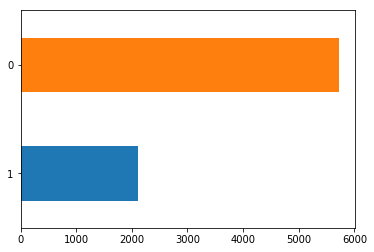

In [8]:
train_metadata['ddf'].value_counts().sort_values().plot(kind='barh')

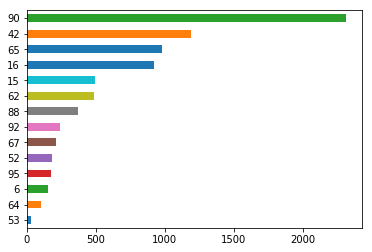

In [9]:
train_metadata['target'].value_counts().sort_values().plot(kind='barh')

In [10]:
train_metadata['object_id'].min(),train_metadata['object_id'].max()

(615, 130779836)

In [11]:
test_metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023


In [12]:
test_metadata['object_id'].min(),test_metadata['object_id'].max()

(13, 130788054)

In [13]:
"""def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    #create a dataframe and optimize its memory usage
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df"""

"def reduce_mem_usage(df):\n\n    start_mem = df.memory_usage().sum() / 1024**2\n    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))\n    \n    for col in df.columns:\n        col_type = df[col].dtype\n        \n        if col_type != object:\n            c_min = df[col].min()\n            c_max = df[col].max()\n            if str(col_type)[:3] == 'int':\n                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:\n                    df[col] = df[col].astype(np.int8)\n                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:\n                    df[col] = df[col].astype(np.int16)\n                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:\n                    df[col] = df[col].astype(np.int32)\n                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:\n                    df[col] = df[col].astype(np.int64)  \n            else:\n                if c_min > n

In [14]:
print(len(set(train_metadata['object_id'])))
print(len(set(train_metadata['ddf'])))
print(len(set(train_metadata['target'])))
print(set(train_metadata['target']))
train_metadata['target'].nunique()

7848
2
14
{64, 65, 67, 6, 42, 15, 16, 52, 53, 88, 90, 92, 62, 95}


14

In [15]:
print(len(set(test_metadata['object_id'])))

3492890


In [16]:
#msno.bar(train_metadata)

In [17]:
#msno.bar(test_metadata)

# TRAIN AND TEST

In [18]:
"""print('-' * 80)
print('train')
train = import_data('training_set.csv')"""

"print('-' * 80)\nprint('train')\ntrain = import_data('training_set.csv')"

In [19]:
"""train = pd.read_csv('training_set.csv',dtype={'object_id':np.int32,'mjd':np.float16,\
                                                   'passband':np.int8,'flux':np.float32,'flux_err':np.float32,'detected':np.int8})"""

"train = pd.read_csv('training_set.csv',dtype={'object_id':np.int32,'mjd':np.float16,                                                   'passband':np.int8,'flux':np.float32,'flux_err':np.float32,'detected':np.int8})"

In [20]:
train = pd.read_csv('training_set.csv',dtype={'object_id':np.int16,'mjd':np.float16,\
                                                   'passband':np.int8,'flux':np.float16,'flux_err':np.float16,'detected':np.int8})

In [21]:
train.shape

(1421705, 6)

In [22]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59744.0,2,-545.0,3.623047,1
1,615,59744.0,1,-816.5,5.554688,1
2,615,59744.0,3,-471.5,3.800781,1
3,615,59744.0,4,-389.0,11.398438,1
4,615,59744.0,2,-682.0,4.042969,1


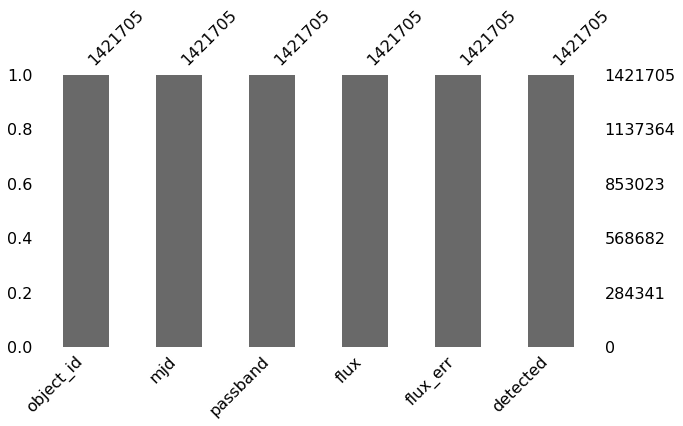

In [23]:
msno.bar(train,figsize=(10,5))

In [24]:
train.dtypes

object_id      int16
mjd          float16
passband        int8
flux         float16
flux_err     float16
detected        int8
dtype: object

In [26]:
%%time
"""test = pd.read_csv('test_set.csv',dtype={'object_id':np.int32,'mjd':np.float16,\
                                                   'passband':np.int8,'flux':np.float32,'flux_err':np.float32,'detected':np.int8})"""
test = pd.read_csv('test_set.csv',dtype={'object_id':np.int32,'mjd':np.float16,\
                                                   'passband':np.int8,'flux':np.float32,'flux_err':np.float32,'detected':np.int8})

CPU times: user 4min 23s, sys: 11.2 s, total: 4min 34s
Wall time: 4min 34s


In [32]:
test.dtypes

object_id      int32
mjd          float16
passband        int8
flux         float32
flux_err     float32
detected        int8
dtype: object

In [34]:
number_chunk = 50000000

In [36]:
%%time
test[number_chunk*0:number_chunk*1].to_csv('test1.csv',index=False)

CPU times: user 4min 30s, sys: 2.27 s, total: 4min 32s
Wall time: 4min 32s


In [37]:
%%time
test1 = pd.read_csv('test1.csv',dtype={'object_id':np.int32,'mjd':np.float16,\
                                                   'passband':np.int8,'flux':np.float32,'flux_err':np.float32,'detected':np.int8})

CPU times: user 26.2 s, sys: 748 ms, total: 26.9 s
Wall time: 26.9 s


In [41]:
%%time
test[number_chunk*1:number_chunk*2].to_csv('test2.csv',index=False)

CPU times: user 4min 23s, sys: 1.72 s, total: 4min 24s
Wall time: 4min 24s


In [42]:
%%time
test[number_chunk*2:number_chunk*3].to_csv('test3.csv',index=False)

CPU times: user 4min 26s, sys: 1.92 s, total: 4min 28s
Wall time: 4min 28s


In [43]:
%%time
test[number_chunk*3:number_chunk*4].to_csv('test4.csv',index=False)

CPU times: user 4min 26s, sys: 2.06 s, total: 4min 28s
Wall time: 4min 28s


In [44]:
%%time
test[number_chunk*4:number_chunk*5].to_csv('test5.csv',index=False)

CPU times: user 4min 22s, sys: 1.74 s, total: 4min 24s
Wall time: 4min 24s


In [45]:
%%time
test[number_chunk*5:number_chunk*6].to_csv('test6.csv',index=False)

CPU times: user 4min 23s, sys: 1.78 s, total: 4min 24s
Wall time: 4min 25s


In [46]:
%%time
test[number_chunk*6:number_chunk*7].to_csv('test7.csv',index=False)

CPU times: user 4min 23s, sys: 1.8 s, total: 4min 25s
Wall time: 4min 25s


In [47]:
%%time
test[number_chunk*7:number_chunk*8].to_csv('test8.csv',index=False)

CPU times: user 4min 22s, sys: 1.79 s, total: 4min 23s
Wall time: 4min 24s


In [48]:
%%time
test[number_chunk*8:].to_csv('test9.csv',index=False)

CPU times: user 4min 41s, sys: 1.82 s, total: 4min 43s
Wall time: 4min 43s


In [ ]:
#msno.bar(test,figsize=(10,5))

# EDA

In [ ]:
gc.collect()

In [ ]:
agg_train = train.groupby(['object_id'])[['flux_err','flux','detected']].agg(['count','min','max','std','sum','mean','median'])

In [ ]:
agg_train.columns = [y+'_'+ x for x in ['flux_err','flux','detected'] for y in ['count','min','max','std','sum','mean','median']]

In [ ]:
agg_train = agg_train.reset_index(drop=False)

In [ ]:
del agg_train['min_detected'], agg_train['max_detected'],agg_train['mean_detected'],agg_train['median_detected']

In [ ]:
agg_train.head()

In [ ]:
%%time
agg_test_1 = test.groupby(['object_id'])[['flux_err']].agg(['count','min','max','std','sum','mean','median'])